# Mine Rock Prediction

Author: Marc Friz

### Overview

This code will help you train and run an AI model. Based on a dataset with sensordata you can predict whether it is a Rock or a Mine.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import losses

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset
The dataset is devided into Rocks and Mines with 60 sensorvalues and one Label at the end.
#### Values
- Rock from 0.0 - 0.6
- Mine from 0.0 - 1.0

In [13]:
# Import Dataset
import_path = './dataset/dataset.csv'
df = pd.read_csv(import_path) 

In [14]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,0.120066,0.115840,0.404753,0.577090,0.343998,0.301909,0.097872,0.371207,0.355165,0.085116,...,0.442539,0.357453,0.259661,0.017739,0.020833,0.407679,0.022148,0.333765,0.101726,R
1,0.128354,0.385129,0.215560,0.539457,0.372407,0.127100,0.539989,0.191122,0.104112,0.489782,...,0.303913,0.313538,0.482250,0.374707,0.123981,0.080222,0.476210,0.453016,0.502236,R
2,0.352046,0.578408,0.275743,0.488505,0.219179,0.256554,0.368006,0.509462,0.519968,0.495312,...,0.493367,0.426709,0.199250,0.149555,0.159081,0.370996,0.367295,0.042633,0.252488,R
3,0.100198,0.121671,0.468583,0.388553,0.565354,0.086205,0.286761,0.342027,0.166864,0.126283,...,0.022442,0.355376,0.224072,0.317932,0.495666,0.357891,0.199521,0.441817,0.528763,R
4,0.488718,0.430351,0.561830,0.131094,0.023866,0.273410,0.228805,0.041593,0.083111,0.246097,...,0.350384,0.347776,0.317020,0.097559,0.101733,0.584094,0.186534,0.323562,0.543892,R


In [15]:
df.shape

(1000, 61)

In [16]:
# Target
y = df['61']

In [17]:
# Data
x = df.drop(['61'],axis=1)
x.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,0.120066,0.115840,0.404753,0.577090,0.343998,0.301909,0.097872,0.371207,0.355165,0.085116,...,0.329267,0.442539,0.357453,0.259661,0.017739,0.020833,0.407679,0.022148,0.333765,0.101726
1,0.128354,0.385129,0.215560,0.539457,0.372407,0.127100,0.539989,0.191122,0.104112,0.489782,...,0.369734,0.303913,0.313538,0.482250,0.374707,0.123981,0.080222,0.476210,0.453016,0.502236
2,0.352046,0.578408,0.275743,0.488505,0.219179,0.256554,0.368006,0.509462,0.519968,0.495312,...,0.184678,0.493367,0.426709,0.199250,0.149555,0.159081,0.370996,0.367295,0.042633,0.252488
3,0.100198,0.121671,0.468583,0.388553,0.565354,0.086205,0.286761,0.342027,0.166864,0.126283,...,0.228236,0.022442,0.355376,0.224072,0.317932,0.495666,0.357891,0.199521,0.441817,0.528763
4,0.488718,0.430351,0.561830,0.131094,0.023866,0.273410,0.228805,0.041593,0.083111,0.246097,...,0.076095,0.350384,0.347776,0.317020,0.097559,0.101733,0.584094,0.186534,0.323562,0.543892


In [ ]:
# Encoding
for idx, y_val in enumerate(y):
    if y_val == 'R':
        y[idx] = 0
    else:
        y[idx] = 1

### Train Test Splitt

In [19]:
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size=0.2, random_state=17)
print(x_training.shape)
print(x_test.shape)

(800, 60)
(200, 60)


## Network

In [20]:
model = Sequential()
model.add(Dense(60,activation='sigmoid', input_dim=60))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 244       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 3,909
Trainable params: 3,909
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x_training, y_training, epochs=100)

Epoch 1/100
800/800 [==============================] - 0s 230us/step - loss: 0.2514 - acc: 0.4900
Epoch 2/100
800/800 [==============================] - 0s 50us/step - loss: 0.2510 - acc: 0.4900
Epoch 3/100
800/800 [==============================] - 0s 33us/step - loss: 0.2506 - acc: 0.4900
Epoch 4/100
800/800 [==============================] - 0s 41us/step - loss: 0.2503 - acc: 0.4900
Epoch 5/100
800/800 [==============================] - 0s 40us/step - loss: 0.2500 - acc: 0.4900
Epoch 6/100
800/800 [==============================] - 0s 42us/step - loss: 0.2497 - acc: 0.4900
Epoch 7/100
800/800 [==============================] - 0s 31us/step - loss: 0.2495 - acc: 0.4875
Epoch 8/100
800/800 [==============================] - 0s 45us/step - loss: 0.2493 - acc: 0.4863
Epoch 9/100
800/800 [==============================] - 0s 32us/step - loss: 0.2491 - acc: 0.4838
Epoch 10/100
800/800 [==============================] - 0s 39us/step - loss: 0.2489 - acc: 0.4875
Epoch 11/100
800/800 [======

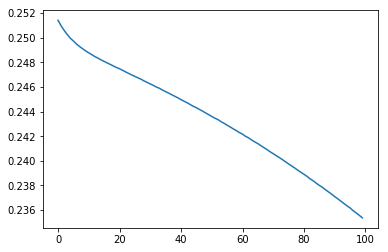

In [23]:
plt.plot(history.history['loss'])

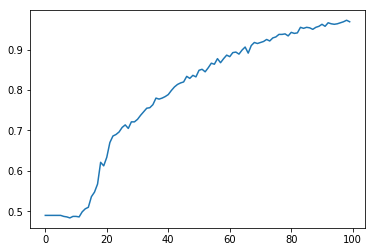

In [24]:
plt.plot(history.history['acc'])

In [25]:
score=model.evaluate(x_test, y_test)
score

200/200 [==============================] - 0s 160us/step


[0.23548365950584413, 0.96499999999999997]